# Author : Pawan
## DSBI Intern @ The Spark foundation
# Task 2 : Clustering using Unsupervised learning
### Description of problem:
- From the given ‘Iris’ dataset, predict the optimum number of clusters
- And Represent it visually.
- Practitioner can get dataset from here [Dataset Link]("https://bit.ly/3kXTdox") 

## Import all the libraries/modules which required for completion of task.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1 : Reading data from the file/source

In [41]:
dataset = pd.read_csv("Iris.csv")    

In [42]:
dataset                                             # <- Preview of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Now check if there are any missing values in your dataset or not.
- if present then deal with it.
- else move to next step.

In [43]:
dataset.isnull().sum()                                        # to check no. of missing values in each column.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [44]:
dataset.columns                                      # <- to see names of columns which are present in dataset.

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Visualising data by grouping them based on "Species" column.

<AxesSubplot:title={'center':'Group-By Species'}, ylabel='Species'>

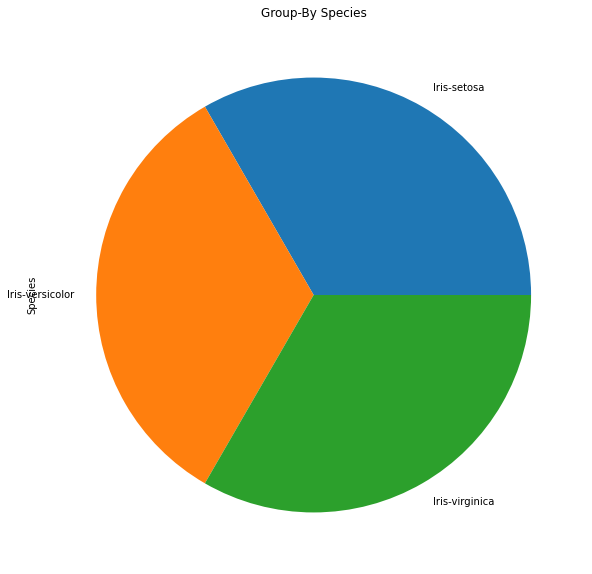

In [45]:
dataset.groupby('Species')['Species'].agg('count').plot(kind='pie',title='Group-By Species',figsize=(20,10))

### Converting Dataset into right format
- "Species" column contain categorical data but ML model only works with numerical data.  
- So in order to tackle this problem we have used LabelEncoder method, which converts categorical data to numerical values.

In [46]:
from sklearn.preprocessing import LabelEncoder                      # <- import LabelEncoder from sklearn

ord_enc = LabelEncoder()
dataset["Species_code"] = ord_enc.fit_transform(dataset["Species"])# <- New values are store in "species_code".
target = dataset['Species_code'] 


In [47]:
Species_names = dataset.Species.unique()                          # <- checking all the unique species names
Species_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Step 2 : Visualizing Input data and its Heirarchy.

In [48]:
data = dataset.iloc[:,1:5].values       # <- "Id" column does not play any role in prediction so we left him out
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

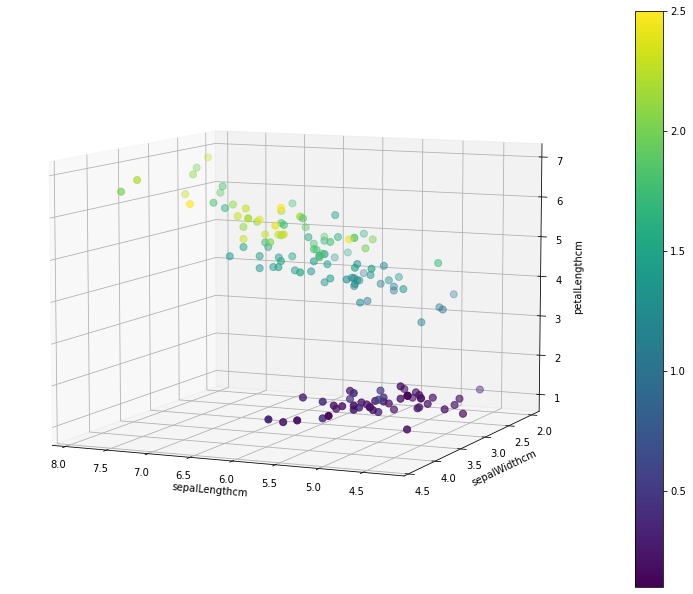

In [49]:
from mpl_toolkits.mplot3d import Axes3D        # <- importing Axes3D from mpl_toolkits for better visualization 

fig = plt.figure(1, figsize=(15,8))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=8, azim=114)


img = ax.scatter(data[:,0], data[:,1], data[:,2], c=data[:,3], cmap=plt.viridis(),s=50)
ax.set_xlabel('sepalLengthcm', fontsize=10, rotation = 0)
ax.set_ylabel('sepalWidthcm', fontsize=10, rotation = 0)
ax.set_zlabel('petalLengthcm', fontsize=10, rotation = 0)
fig.colorbar(img)
plt.show()

### Hierarchical clustering dendogram
- A dendrogram is a diagram that shows the hierarchical relationship between objects.
- The main use of a dendrogram is to work out the best way to allocate objects to clusters.

In [50]:
from scipy.cluster.hierarchy import linkage,dendrogram     # <- Importing required library.

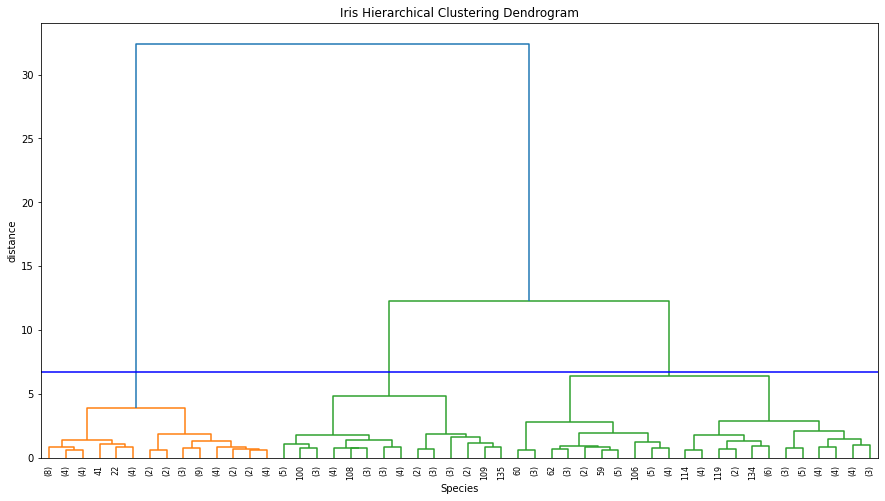

In [51]:
hier=linkage(data,"ward")
max_d=6.70
plt.figure(figsize=(15,8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    hier,
    truncate_mode='lastp',  
    p=50,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,     
)
plt.axhline(y=max_d, c='b')
plt.show()


# Step 3 : Data Preprocessing   

In [52]:
x = dataset.iloc[:,1:5]
y = dataset.iloc[:,-1]

In [53]:
x.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [54]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_code, Length: 150, dtype: int32

# Step 4 : Finding Optimal no. of clusters
- We are using Elbow method to calculate optimal no. of cluster.
- "inertia" actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.

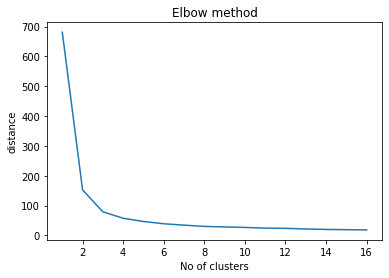

In [55]:
distance = list()                            
for i in range(1, 17):
    kmeans_model = KMeans(n_clusters = i)
    kmeans_model.fit(x)
    distance.append(kmeans_model.inertia_)      # <- refer to second point in above markdown

plt.plot(range(1, 17), distance)                # plotting no. of clusters vs distance/inertia in their case.
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('distance')
plt.show()

### Result: Shape of elbow is formed between 2 and 4. which means optimal value for no. of clusters is 3.

# Step 5 : Model training with optimal no. of clusters

In [56]:
k_mean_model_for_3 = KMeans(n_clusters=3)        
pred_k_mean_model_for_3 = k_mean_model_for_3.fit_predict(x)  
pred_k_mean_model_for_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [57]:
k_mean_model_for_3.cluster_centers_                     # <- centroid of formed clusters.  

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Step 6 : visualizing the model cluster

## In 2D.

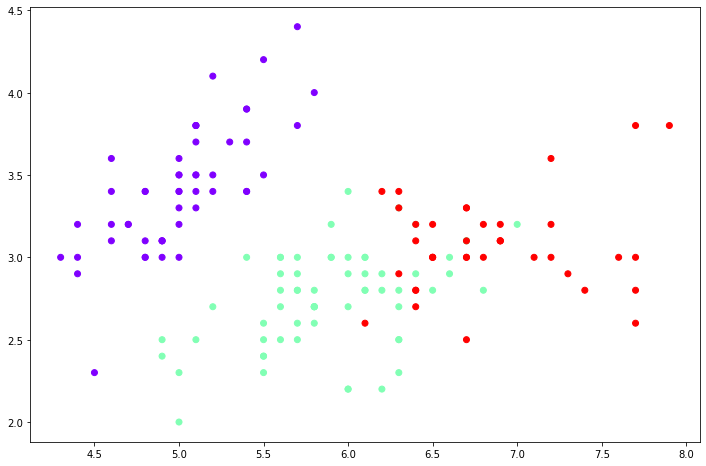

In [58]:
plt.figure(figsize=(12,8))
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=pred_k_mean_model_for_3, cmap="rainbow")

## In 3D.

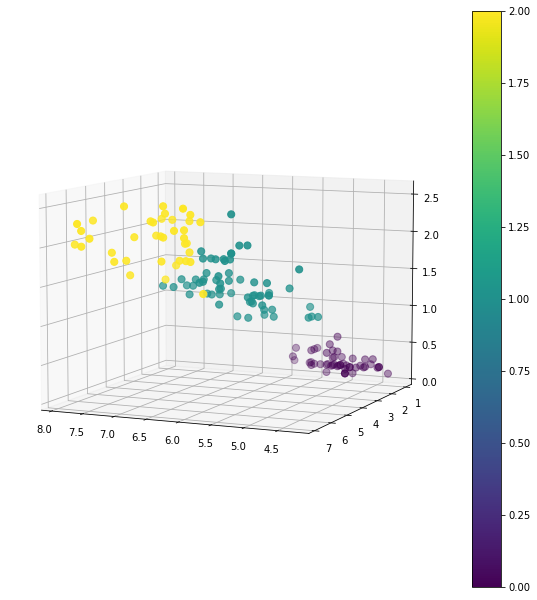

In [59]:
fig = plt.figure(1, figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=8, azim=114)               


img = ax.scatter(x.iloc[:,0],x.iloc[:,2], x.iloc[:,3], c=pred_k_mean_model_for_3, cmap=plt.viridis(),s=50)
fig.colorbar(img)

plt.show()

# Step 7 : Calculate the Accuracy.

In [60]:
import sklearn.metrics as sm
sm.accuracy_score(pred_k_mean_model_for_3, y)      # <- calculating accuracy score   

0.8933333333333333

# Conclusion
## Task 2 Completed
- [x] predicted the optimum no. of clusters
- [x] visualize the data